# Image Classification (Rock-Paper-Scissors) with NN/CNN

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
# Get information on data
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

### Preparing data

In [3]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteI0FJFD/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteI0FJFD/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


### Show Examples

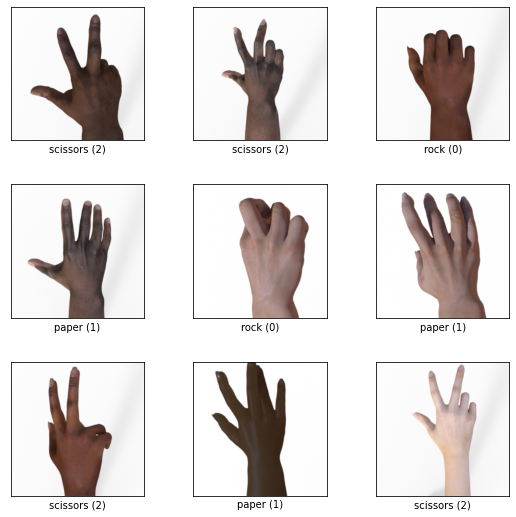

In [4]:
fig = tfds.show_examples(ds_train, info)

### Aditional Data Preparation (changing datatype, normalization)

In [5]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [6]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## First (non-convolutional) NN

In [7]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, input_shape=(300,300,1), activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(3, activation="softmax")                           
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 26ms/step - loss: 27.5879 - accuracy: 0.4060
Epoch 2/5
79/79 [==============================] - 2s 25ms/step - loss: 1.5629 - accuracy: 0.6214
Epoch 3/5
79/79 [==============================] - 2s 25ms/step - loss: 0.6047 - accuracy: 0.8151
Epoch 4/5
79/79 [==============================] - 2s 25ms/step - loss: 0.5276 - accuracy: 0.8179
Epoch 5/5
79/79 [==============================] - 2s 25ms/step - loss: 0.4186 - accuracy: 0.8496


In [8]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 12ms/step - loss: 2.7063 - accuracy: 0.4435


[2.706268072128296, 0.44354838132858276]

## Terrible accuracy of 44%

## The data is overfitted, so let's try a convolutional approach (CNN)

In [9]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation="relu", input_shape=(300,300,1)),
   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(3, activation="softmax")                          
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 56s 343ms/step - loss: 5.1467 - accuracy: 0.5694
Epoch 2/5
79/79 [==============================] - 25s 319ms/step - loss: 0.4483 - accuracy: 0.8825
Epoch 3/5
79/79 [==============================] - 25s 318ms/step - loss: 0.1969 - accuracy: 0.9702
Epoch 4/5
79/79 [==============================] - 25s 320ms/step - loss: 0.8293 - accuracy: 0.7020
Epoch 5/5
79/79 [==============================] - 25s 320ms/step - loss: 0.4491 - accuracy: 0.8484


In [10]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 3s 232ms/step - loss: 1.0427 - accuracy: 0.5000


[1.042726993560791, 0.5]

## Still terrible! (accuracy = 50%)

In [13]:
model = tf.keras.Sequential([
   tf.keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),                       
   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(3, activation="softmax")                          
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 47ms/step - loss: 1.1129 - accuracy: 0.7294
Epoch 2/5
79/79 [==============================] - 3s 43ms/step - loss: 0.1166 - accuracy: 0.9794
Epoch 3/5
79/79 [==============================] - 3s 43ms/step - loss: 0.0255 - accuracy: 0.9976
Epoch 4/5
79/79 [==============================] - 3s 43ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 3s 43ms/step - loss: 0.0062 - accuracy: 0.9996


In [14]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 44ms/step - loss: 0.9713 - accuracy: 0.7124


[0.9712545871734619, 0.7123655676841736]

## A lot better accuracy of 71%.

## Let's try additional tweaks.

In [16]:
model = tf.keras.Sequential([
   tf.keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),                       
   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(3, activation="softmax")                          
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 43ms/step - loss: 0.8256 - accuracy: 0.6615
Epoch 2/5
79/79 [==============================] - 3s 42ms/step - loss: 0.1683 - accuracy: 0.9671
Epoch 3/5
79/79 [==============================] - 3s 41ms/step - loss: 0.0432 - accuracy: 0.9925
Epoch 4/5
79/79 [==============================] - 3s 42ms/step - loss: 0.0146 - accuracy: 0.9984
Epoch 5/5
79/79 [==============================] - 3s 42ms/step - loss: 0.0063 - accuracy: 1.0000


In [17]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 27ms/step - loss: 0.7106 - accuracy: 0.7392


[0.7105887532234192, 0.7392473220825195]

## Little improvement (accuracy = 74%).

In [18]:
model = tf.keras.Sequential([
   tf.keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),                       
   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(3, activation="softmax")                          
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 44ms/step - loss: 0.8312 - accuracy: 0.6433
Epoch 2/5
79/79 [==============================] - 3s 42ms/step - loss: 0.1792 - accuracy: 0.9639
Epoch 3/5
79/79 [==============================] - 3s 42ms/step - loss: 0.0617 - accuracy: 0.9877
Epoch 4/5
79/79 [==============================] - 3s 43ms/step - loss: 0.0203 - accuracy: 0.9956
Epoch 5/5
79/79 [==============================] - 3s 42ms/step - loss: 0.0091 - accuracy: 0.9988


In [19]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 25ms/step - loss: 0.9018 - accuracy: 0.7285


[0.9018153548240662, 0.7284946441650391]

## No improvement (accuracy = 73%).

In [20]:
model = tf.keras.Sequential([
   tf.keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),                       
   tf.keras.layers.Conv2D(64, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.Conv2D(32, 3, strides=(1,1), activation="relu"),
   tf.keras.layers.MaxPool2D(2,2),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation="relu"),
   tf.keras.layers.Dense(3, activation="softmax")                          
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 48ms/step - loss: 0.7547 - accuracy: 0.6897
Epoch 2/5
79/79 [==============================] - 4s 48ms/step - loss: 0.0885 - accuracy: 0.9798
Epoch 3/5
79/79 [==============================] - 4s 47ms/step - loss: 0.0137 - accuracy: 0.9980
Epoch 4/5
79/79 [==============================] - 4s 48ms/step - loss: 0.0054 - accuracy: 0.9996
Epoch 5/5
79/79 [==============================] - 4s 48ms/step - loss: 0.0034 - accuracy: 0.9996


In [22]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 21ms/step - loss: 1.4598 - accuracy: 0.7016


[1.4597755670547485, 0.7016128897666931]

## No improvement (accuracy = 70%)

## Hyperparameter Tuning

In [23]:
pip install -U keras-tuner

     |████████████████████████████████| 97 kB 3.1 MB/s 


In [32]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)))

  model.add(tf.keras.layers.Conv2D(64, 3, activation="relu"))
  model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))

  model.add(tf.keras.layers.MaxPool2D(2,2))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation="relu"))
  model.add(tf.keras.layers.Dense(3, activation="softmax"))

  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  
  return model

tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [33]:
best_model = tuner.get_best_models()[0]

In [34]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 25ms/step - loss: 0.5267 - accuracy: 0.8091


[0.5267319083213806, 0.8091397881507874]

## A lot better! (accuracy = 81%)

### Examples of wrongfully classified images


In [50]:
np.round(best_model.predict(test_images))[2,:]

array([0., 1., 0.], dtype=float32)

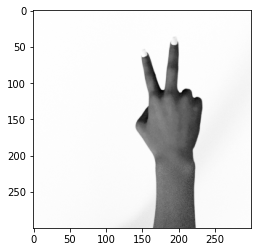

In [48]:
plt.imshow(test_images[2].reshape(300,300), cmap='Greys_r')
# This image is classified as "paper", even though it is scissors.

In [59]:
np.round(best_model.predict(test_images))[7,:]

array([0., 0., 1.], dtype=float32)

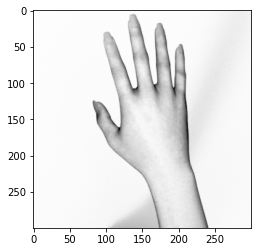

In [60]:
plt.imshow(test_images[7].reshape(300,300), cmap='Greys_r')
# This image is classified as "scissors", even though it is paper.

In [73]:
np.round(best_model.predict(test_images))[14,:]

array([0., 1., 0.], dtype=float32)

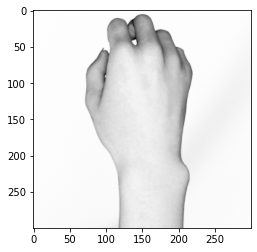

In [74]:
plt.imshow(test_images[14].reshape(300,300), cmap='Greys_r')
# This image is classified as "paper", even though it is rock.